## Get the Decision path for the leaf Nodes - Random Forest (scikit)

In [3]:
# Setup
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

# Set seed for reproducibility
np.random.seed(1015)

/Users/shamindras/anaconda/envs/sklearnprod0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Run the Previous iris example

* Produce the decision tree diagrams as a checking mechanism

In [4]:
def draw_tree(inp_tree
              , out_file = None
              , filled=True
              , rounded=True
              , special_characters=True):
    dot_data = tree.export_graphviz(inp_tree
                                    , out_file = out_file
                                    , filled   = filled
                                    , rounded  = rounded
                                    , special_characters = special_characters)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)

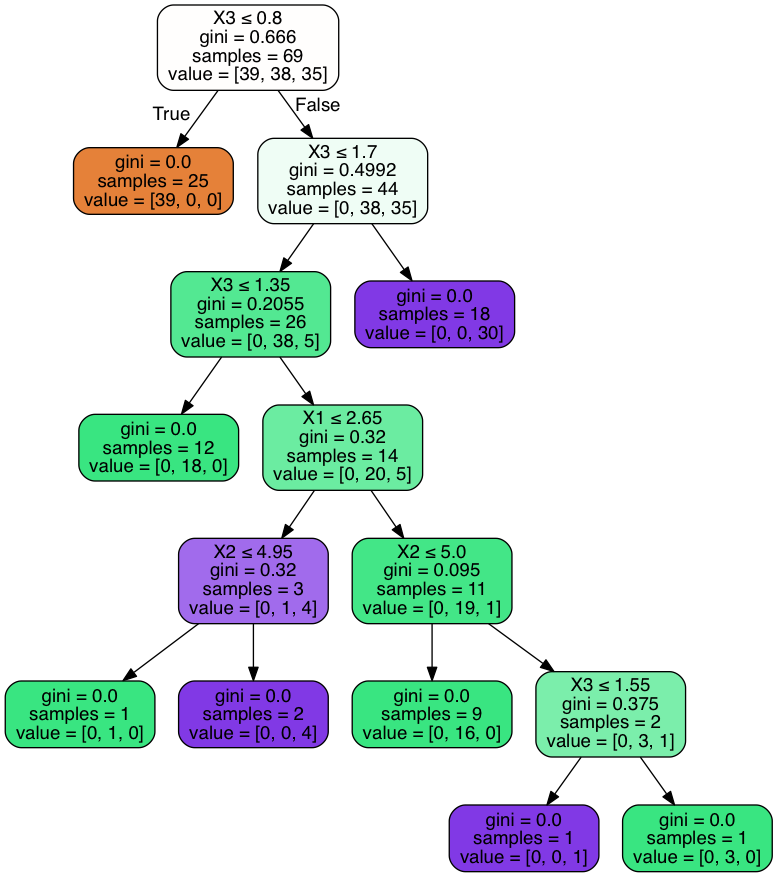

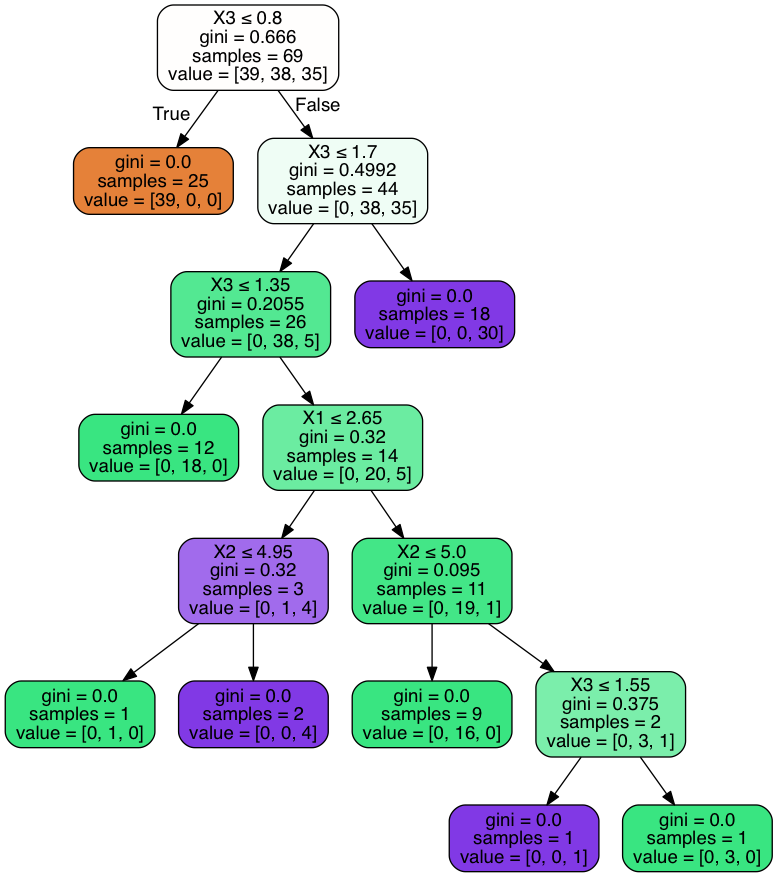

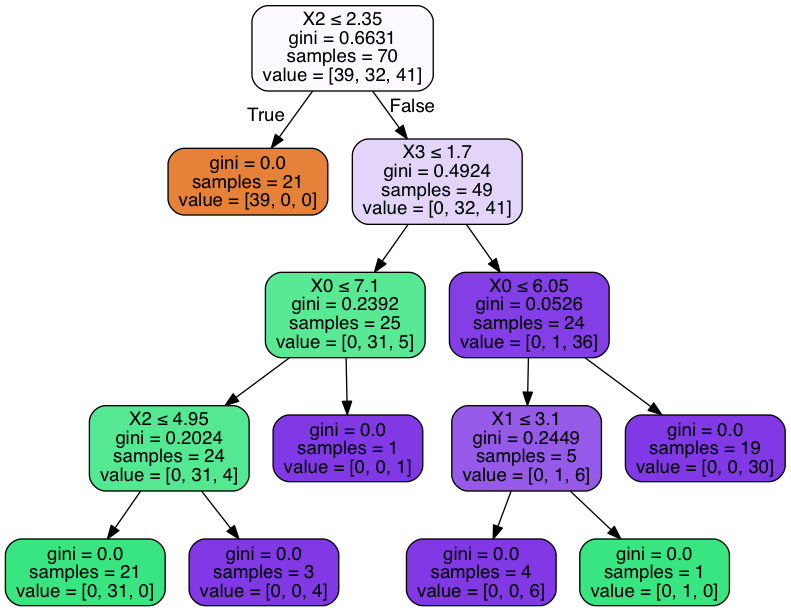

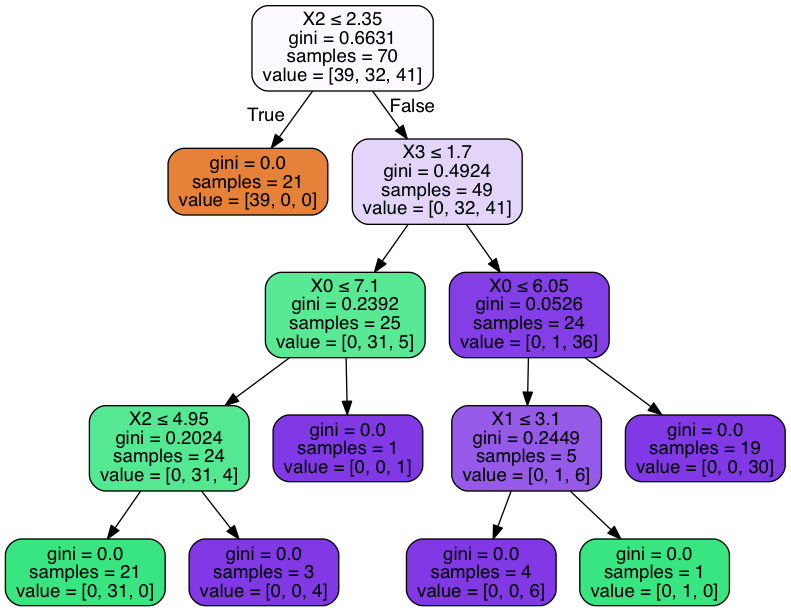

In [5]:
# Load the iris data
iris = load_iris()

# Create the train-test datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

np.random.seed(1039)

# Just fit a simple random forest classifier with 2 decision trees
rf = RandomForestClassifier(n_estimators = 2)
rf.fit(X = X_train, y = y_train)

# Define a function to draw the decision trees in IPython
# Adapted from: http://scikit-learn.org/stable/modules/tree.html
from IPython.display import display, Image
import pydotplus
    
# Now plot the trees individually
for dtree in rf.estimators_:
    dot_data = tree.export_graphviz(dtree
                                    , out_file = None
                                    , filled   = True
                                    , rounded  = True
                                    , special_characters = True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    img = Image(graph.create_png())
    display(img)
    draw_tree(inp_tree = dtree)
    #print(dtree.tree_.feature)

### Get the tree paths

* The following code is taken from:
https://github.com/andosa/treeinterpreter/blob/master/treeinterpreter/treeinterpreter.py#L12-L33

In [84]:
tval = list(np.sort(np.unique(y_train)))
print(tval)

[0, 1, 2]


In [91]:
feature_names = ["X" + str(i) for i in range(X_train.shape[1])]
target_vals = list(np.sort(np.unique(y_train)))
target_names = ["y" + str(i) for i in target_vals]
print(feature_names)
print(target_names)

['X0', 'X1', 'X2', 'X3']
['y0', 'y1', 'y2']


In [94]:
from sklearn import tree
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value     = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [95]:
for idx, dtree in enumerate(rf.estimators_):    
    get_code(tree = dtree, feature_names = feature_names, target_names = target_names)

if ( X3 <= 0.800000011921 ) {
    return y0 ( 39 examples )
}
else {
    if ( X3 <= 1.70000004768 ) {
        if ( X3 <= 1.34999990463 ) {
            return y1 ( 18 examples )
        }
        else {
            if ( X1 <= 2.65000009537 ) {
                if ( X2 <= 4.94999980927 ) {
                    return y1 ( 1 examples )
                }
                else {
                    return y2 ( 4 examples )
                }
            }
            else {
                if ( X2 <= 5.0 ) {
                    return y1 ( 16 examples )
                }
                else {
                    if ( X3 <= 1.54999995232 ) {
                        return y2 ( 1 examples )
                    }
                    else {
                        return y1 ( 3 examples )
                    }
                }
            }
        }
    }
    else {
        return y2 ( 30 examples )
    }
}
if ( X2 <= 2.34999990463 ) {
    return y0 ( 39 examples )
}
else {
    if ( X3 <= 1.7000

In [133]:
from sklearn.tree import _tree
def _get_tree_paths(tree, node_id = 0, depth = 0):
    """
    Returns all paths through the tree as list of node_ids
    """
   
    if node_id == _tree.TREE_LEAF:
        raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child      != _tree.TREE_LEAF:
        left_paths     = _get_tree_paths(tree, left_child, depth = depth + 1)
        left_features  = np.array([tree.feature[i] for i in left_paths]).tolist()
        print(left_features)
        right_paths    = _get_tree_paths(tree, right_child, depth = depth + 1)
        right_features = np.array([tree.feature[i] for i in right_paths]).tolist()
        print(right_features)

        # organize paths
        for path in left_paths:
            path.append(node_id)            
        for path in right_paths:
            path.append(node_id)            
        paths = left_paths + right_paths
        
        features = left_features + right_features
        print(features)
        # organize features
        #for feature in left_features:
        #    feature.append(feature(node_id))
        #for feature in right_features:
        #    feature.append(feature(node_id))
    else:
        paths = [[node_id]]               
    
    return paths

In [134]:
leaf_node_paths = dict()
leaf_to_path = dict()
for idx, dtree in enumerate(rf.estimators_):    
    # leaf_to_path = {}
    node_paths = _get_tree_paths(tree = dtree.tree_, node_id = 0, depth = 0)
    leaf_node_paths[idx] = node_paths    
    #map leaves to paths
    for path in node_paths:
        leaf_to_path[path[-1]] = path

[[-2]]
[[-2]]
[[-2]]
[[-2]]
[[-2], [-2]]
[[-2, 2], [-2, 2]]
[[-2]]
[[-2]]
[[-2]]
[[-2], [-2]]
[[-2, 3], [-2, 3]]
[[-2], [-2, 3], [-2, 3]]
[array([-2,  2]), array([-2,  3,  2]), array([-2,  3,  2])]
[[-2, 2], [-2, 2], array([-2,  2]), array([-2,  3,  2]), array([-2,  3,  2])]
[array([-2,  2,  1]), array([-2,  2,  1]), array([-2,  2,  1]), array([-2,  3,  2,  1]), array([-2,  3,  2,  1])]
[[-2], array([-2,  2,  1]), array([-2,  2,  1]), array([-2,  2,  1]), array([-2,  3,  2,  1]), array([-2,  3,  2,  1])]
[array([-2,  3]), array([-2,  2,  1,  3]), array([-2,  2,  1,  3]), array([-2,  2,  1,  3]), array([-2,  3,  2,  1,  3]), array([-2,  3,  2,  1,  3])]
[[-2]]
[array([-2,  3]), array([-2,  2,  1,  3]), array([-2,  2,  1,  3]), array([-2,  2,  1,  3]), array([-2,  3,  2,  1,  3]), array([-2,  3,  2,  1,  3]), [-2]]
[array([-2,  3,  3]), array([-2,  2,  1,  3,  3]), array([-2,  2,  1,  3,  3]), array([-2,  2,  1,  3,  3]), array([-2,  3,  2,  1,  3,  3]), array([-2,  3,  2,  1,  3,  3]), 

In [106]:
leaf_node_paths

{0: [[1, 0],
  [4, 3, 2, 0],
  [7, 6, 5, 3, 2, 0],
  [8, 6, 5, 3, 2, 0],
  [10, 9, 5, 3, 2, 0],
  [12, 11, 9, 5, 3, 2, 0],
  [13, 11, 9, 5, 3, 2, 0],
  [14, 2, 0]],
 1: [[1, 0],
  [5, 4, 3, 2, 0],
  [6, 4, 3, 2, 0],
  [7, 3, 2, 0],
  [10, 9, 8, 2, 0],
  [11, 9, 8, 2, 0],
  [12, 8, 2, 0]]}

In [65]:
leaf_to_path

{0: [12, 8, 2, 0]}

In [135]:
len(rf.estimators_)

2

In [136]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [155]:
first_tree = rf.estimators_[0].tree_
#dir(first_tree)

In [156]:
first_tree.max_depth

6

In [172]:
estimator = rf.estimators_[1]
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
nodes = []

stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1
    
    #np.append(arr=nodes, values=node_id)
    nodes.append(node_id)

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [173]:
node_depth

array([ 0.,  1.,  1.,  2.,  3.,  4.,  4.,  3.,  2.,  3.,  4.,  4.,  3.])

In [174]:
is_leaves

array([False,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True,  True], dtype=bool)

In [176]:
nodes

[0, 2, 8, 12, 9, 11, 10, 3, 7, 4, 6, 5, 1]

In [177]:
len(nodes)

13

In [179]:
node_depth.shape

(13,)

In [185]:
leaf_nodes = [nodes[idx] for (idx, _) in enumerate(nodes) if is_leaves[idx]]
leaf_nodes

[2, 11, 10, 3, 6, 5, 1]